<a href="https://colab.research.google.com/github/the-curious-analyst/The-Sparks-Foundation---Tasks/blob/main/Task3_Exploratory%20Data%20Analysis%20-%20Retail/eda_ssuperstore_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *The Sparks Foundation -  Data Science & Analytics Internship*
# **AUTHOR - AMINA RAHMAN K**

# TASK 3: Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’
Try to find out the weak areas where you can work to make more profit.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numba
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.precision", 3)

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/the-curious-analyst/The-Sparks-Foundation---Tasks/main/Task3_Exploratory%20Data%20Analysis%20-%20Retail/SampleSuperstore.csv')

In [ ]:
df.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.960,2,0.00,41.914
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.940,3,0.00,219.582
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.620,2,0.00,6.871
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.577,5,0.45,-383.031
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.368,2,0.20,2.516
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.860,7,0.00,14.169
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.280,4,0.00,1.966
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.152,6,0.20,90.715
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.504,3,0.20,5.782
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.900,5,0.00,34.470


We can analyse the data further in 3 different ways

- PRODUCT LEVEL ANALYSIS
- CUSTOMER LEVEL ANALYSIS
- REGION LEVEL ANALYSIS

# EXPLORATORY DATA ANAYSIS

In [ ]:
df.drop('Postal Code',axis=1,inplace=True)

In [ ]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000,9994.000,9994.000,9994.000
mean,229.858,3.790,0.156,28.657
std,623.245,2.225,0.206,234.260
min,0.444,1.000,0.000,-6599.978
25%,17.280,2.000,0.000,1.729
50%,54.490,3.000,0.200,8.666
75%,209.940,5.000,0.200,29.364
max,22638.480,14.000,0.800,8399.976


We can see that on an average the sales is \$229.858 and profit is \$28.657, which is quite low for a superstore, but going further we see that it may be affected by the extreme values since the minimum value is -6599.978 and maximum value is 8399.976.This can also confirmed by plotting a boxplot.From this it is obvious that the superstores performance is not a consistent one.It may vary with the city/region/ship mode etc. or even the time of the year.Let's check which tuple had the most and least profit.

In [ ]:
df.loc[(df.Profit == df.Profit.min()) | (df.Profit == df.Profit.max())]

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
6826,Standard Class,Corporate,United States,Lafayette,Indiana,Central,Technology,Copiers,17499.950,5,0.0,8399.976
7772,Standard Class,Consumer,United States,Lancaster,Ohio,East,Technology,Machines,4499.985,5,0.7,-6599.978


Lets's check if copiers as a whole, provide  high profits or if Machines are a reason for low profits?Are corporate purchases more profitable for the company?
We saw that the customer bought 5 quantities each of both commodities,so did the 0.7% discount on Machine actually hurt the company?

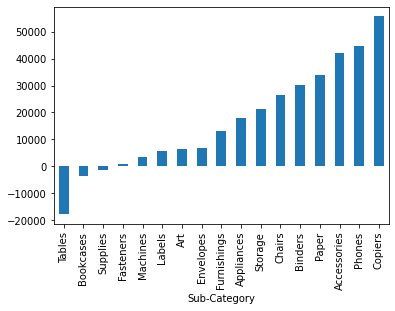

In [ ]:
df.groupby('Sub-Category')['Profit'].sum().sort_values().plot(kind='bar')

We see that copiers do contribute the most to the profit , while the sales of tables are bringing in huge losses for the store.

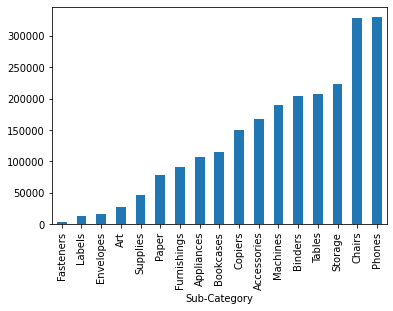

In [ ]:
df.groupby('Sub-Category')['Sales'].sum().sort_values().plot(kind='bar')

Fasteners,labels,Envelope,Art,Supplies are the least moving products all of whom belong to Office Supplies category.Phones and Chairs almost makes  the same sales.Furnitures and Technology do seem to dominate most of the upper strata of the sales.

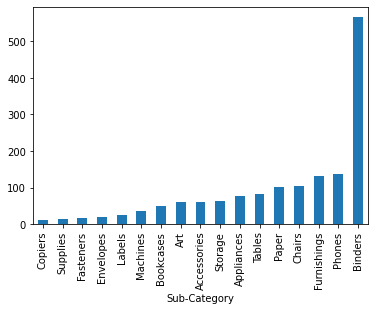

In [ ]:
df.groupby('Sub-Category')['Discount'].sum().sort_values().plot(kind='bar')

The superstore is providing low-medium discount for commodities with higher profits (most of them) and is providing more discount for the products with more sales but with significantly less profit.For products with negative profits, the company seemingly doesn't go above a threshold for the discount(Which may actually be a good thing).
- Copier which had the most profit and Fastener,Supplies which had close to 0 profit are both given almost no discounts.

Since the sum of discount take the quantity of commodities let's plot with the average to get a clearer idea.

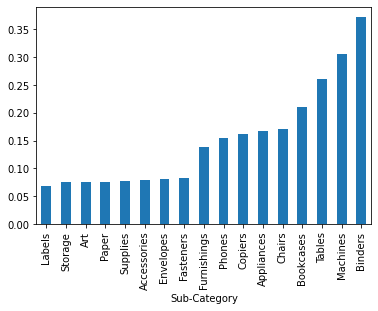

In [ ]:
df.groupby('Sub-Category')['Discount'].mean().sort_values().plot(kind='bar')

Ah!Much more clear! Here we can see why table was the least profitable commodity, it was provided with the most discount!This might have been done to push the sales/seasonal patterns/contracts with cooperates.From this plot we see that the sales,profit,and discount of the blinders are extremely codependent.Also we see that machines too,on an average are being provided with a decent discount everytime, hence explaining the negative profit and resonably good sales numbers.

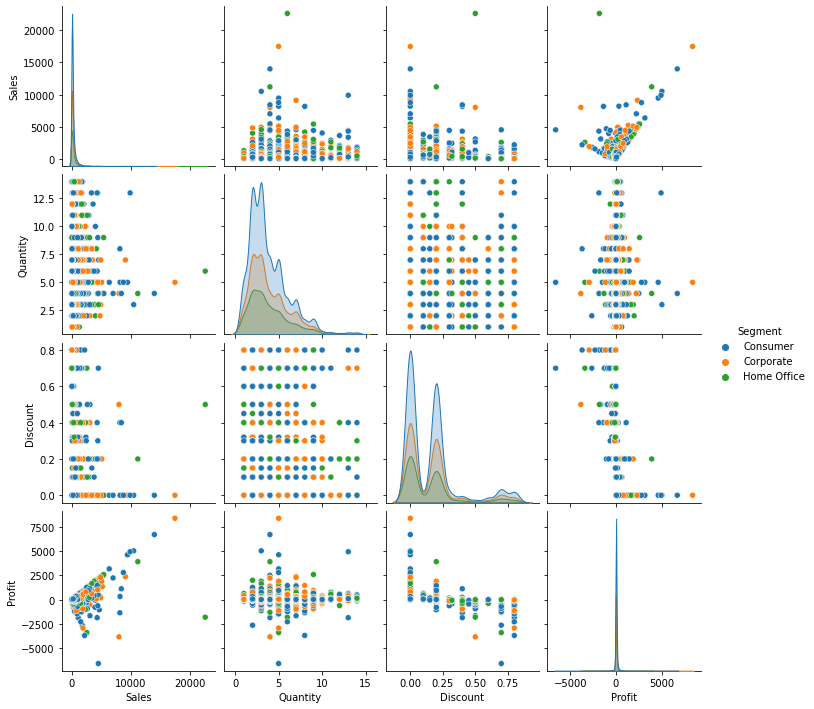

In [ ]:
sns.pairplot(data=df,hue='Segment')

Eventhough discount and quantity are scale variables, they are following a discrete pattern

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Region        9994 non-null   object 
 6   Category      9994 non-null   object 
 7   Sub-Category  9994 non-null   object 
 8   Sales         9994 non-null   float64
 9   Quantity      9994 non-null   int64  
 10  Discount      9994 non-null   float64
 11  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 937.1+ KB


### Check for NA values

In [ ]:
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

> Lets do some basic countplots to get a taste of the categorical data

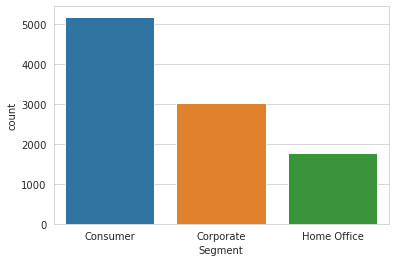

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Segment',data=df)
plt.show()

Almost above 50% of their customers are consumers,which may be why items like storage and phones got into the top 3 sold products.Home office contributes the least but their orders may be of great profit/price.

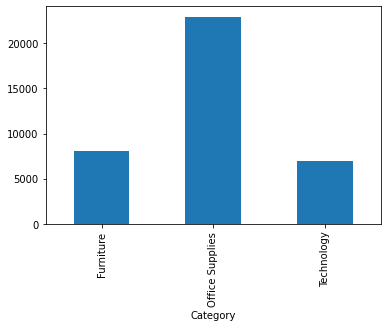

In [ ]:
df.groupby('Category')['Quantity'].sum().plot(kind='bar')
plt.show()

Office supplies are the most sold commodity category,with furniture and technology contributing in almost the same pattern.

Since consumer is the largest customer segment, let's see what sub-categories the consumers are most interested in.

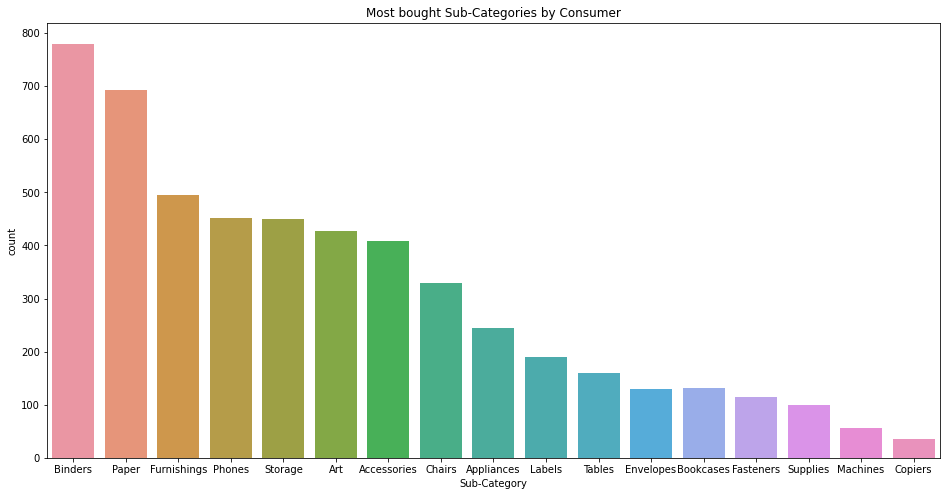

In [ ]:
plt.figure(figsize=(16,8))
sns.countplot(x='Sub-Category',data=df[df['Segment']=='Consumer'],order = df['Sub-Category'].value_counts().index)
plt.title('Most bought Sub-Categories by Consumer')
plt.show()

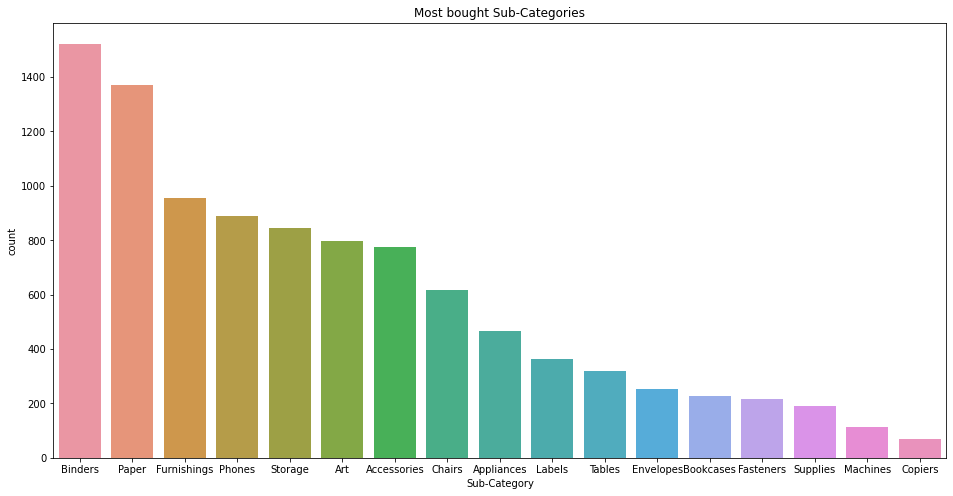

In [ ]:
plt.figure(figsize=(16,8))
sns.countplot(x='Sub-Category',data=df,order = df['Sub-Category'].value_counts().index)
plt.title('Most bought Sub-Categories')
plt.show()

From comparing the above two plots(even though they may seem the same,the scales are different) we see that they follow a similar pattern,since consumers are of higher proportion they affecting the overall picture.Blinders and Papers are being ordered the most

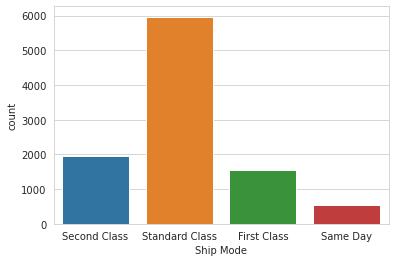

In [ ]:
sns.countplot(x='Ship Mode',data=df)
plt.show()

Same day shipments are very less and Standard class is the most used ship mode.Later we'll check whether superstore is purposefully avoiding sae day shipments to reduce loss.

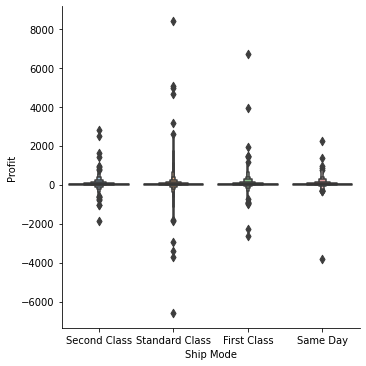

In [5]:
sns.catplot(x='Ship Mode',y='Profit',data = df,kind = 'boxen')

It can be observed that higher profits are coming when the ship mode is Standard Class/First Class. Even with less values counts there are few outliers in Same Day which is laying below 0 and not much laying above (like second class).Which explains why Same Day Shipments happens less, or it maybe purely because of customer choices.

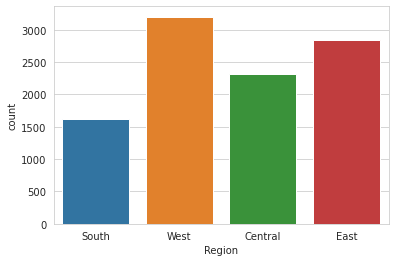

In [ ]:
sns.countplot(x='Region',data=df)
plt.show()

Most of the sales are from the west,even though the east wing is sharing similar numbers too.South seems to be doing very poorly,let's check whether their respective sales follow the similar pattern. 

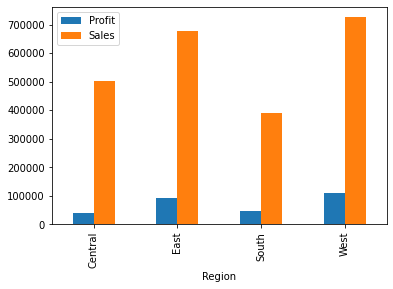

In [ ]:
df.groupby('Region')['Profit','Sales'].sum().plot(kind='bar')

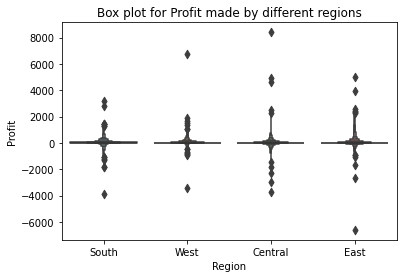

In [ ]:
plt.title('Box plot for Profit made by different regions')
sns.boxenplot(data=df,x='Region',y='Profit',orient='v')
plt.show()

We see that even though South had the least _number of sales_, it's during comparatively better in sales considering that, eventhough East and West had significantly more number of sales than South, they both could'nt go over by that margin in case of sales money.
- West region does seem to be doing well in all the aspects
- Central seems to be doing very poorly especially in case of profit(maybe because it has the most number of extreme negative profit values(outlliers) out of all the regions).Eventhough it had almost 700 sales orders more than South,it could only outperform South by about \$100000 in sales,while also having the worst profit.

Text(0.5, 1.0, 'Distribution of Discount')

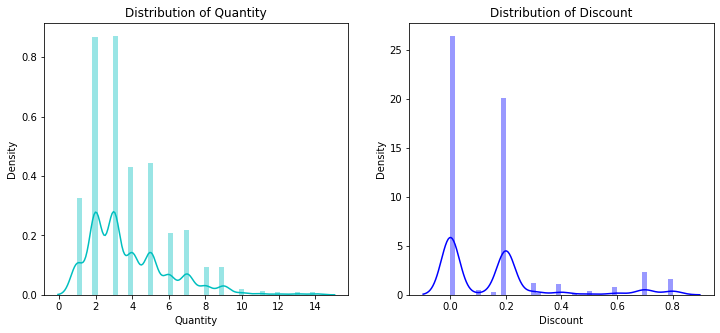

In [ ]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(df["Quantity"],color='c',ax=ax)
ax.set_title('Distribution of Quantity')

ax=f.add_subplot(122)
sns.distplot(df['Discount'],color='b',ax=ax)
ax.set_title('Distribution of Discount')

Superstore most commonly provides 0-0.2 % discounts, maybe because higher discount may equate to more less.

Text(0.5, 1.0, 'Distribution of Profit')

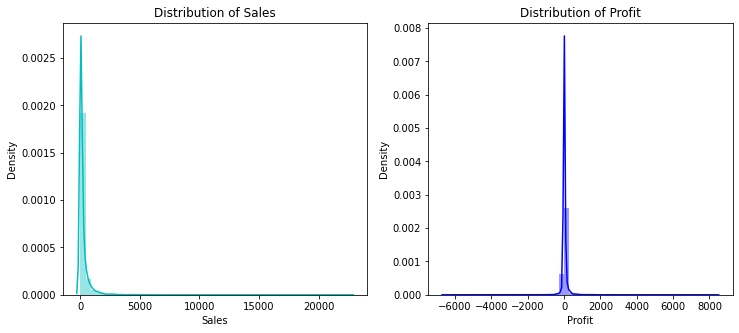

In [ ]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(df["Sales"],color='c',ax=ax)
ax.set_title('Distribution of Sales')

ax=f.add_subplot(122)
sns.distplot(df['Profit'],color='b',ax=ax)
ax.set_title('Distribution of Profit')

In [ ]:
(df.Profit < 0).sum()/len(df) * 100

18.721232739643785

- Most of the sales lies in the 0 - 2500 region, higher sales occurs very less in superstore.
- 18.71% of the orders ended up bringing loss to the superstore.

In [ ]:
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

fig = px.sunburst(df,
                 path=['Country','Category','Sub-Category'],
                 values='Sales',color='Category')
fig.update_layout(height=1000,title_text='Product Categories & Sub-Categories')
fig.show()

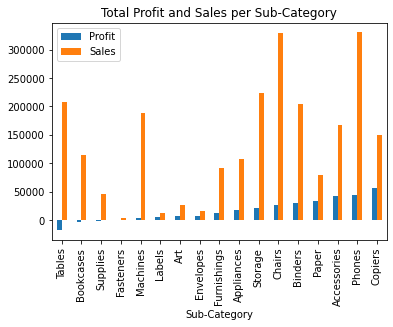

In [ ]:
df.groupby('Sub-Category')['Profit','Sales'].sum().sort_values(by='Profit').plot.bar()
plt.title('Total Profit and Sales per Sub-Category')
plt.show()

As observed from above, eventhough some commodities with higher sales does seem to have profit, there does'nt seem to be a clear relationship between the 2.Let's plot a scatterplot to confirm this hypothesis.
- Fasteners doesn't seem to be having any effect on the total profit and has the least sales.
- Machines has the least positive profit, maybe due to the more discount offers given for it/that quantity ordered will be less for this commodity

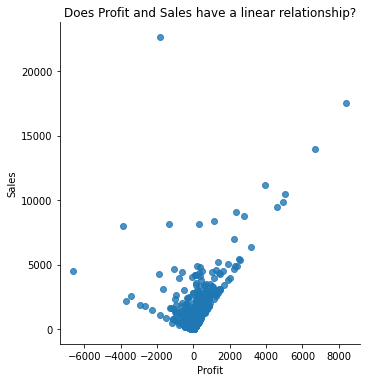

In [ ]:
sns.lmplot(x="Profit",y="Sales",data=df,fit_reg=False)
plt.title('Does Profit and Sales have a linear relationship?')
plt.show()

A linear relationship does'nt seem to exist and it appears to follow more of a clustering pattern.

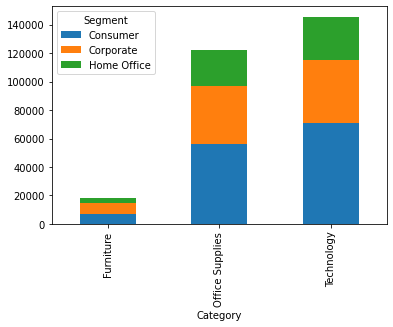

In [ ]:
pd.crosstab(index=df["Category"],columns=df["Segment"],values=df["Profit"],aggfunc="sum").plot(kind="bar",stacked=True)

Most number of Consumers(which was almost 50% of the total customers) comes under the technology bar.Also Technology commodities like Copiers/Machines contributed most towards the Profit/Sales, so we may confirm that the profit is highest from the technology sector.
- We also saw that office supplies contributed to the most *number of sales*,but from the above graph it brings about \$20000 less in profit than Technology,this may be the case since almost all of the subcategory products which brought loss to superstore belonged to Office Supplies.

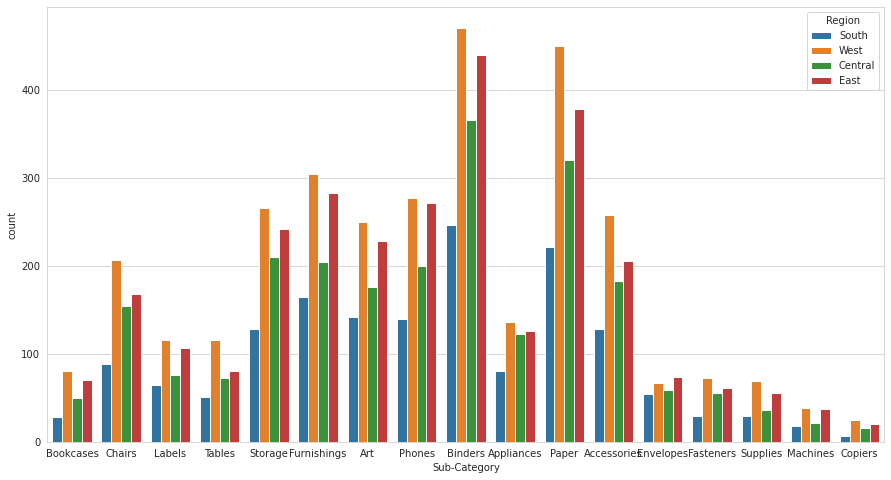

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x="Sub-Category", hue="Region", data=df)
plt.show()

Going along with our above conclusion we can seee why Central region had the least profit since it had comparatively less orders for technology sub-categories(eventhough south had the least,may be it got more quantity and had less orders for the products which brought in loss) and had more orders in the products which dealt with loss (tables,bookcases etc).

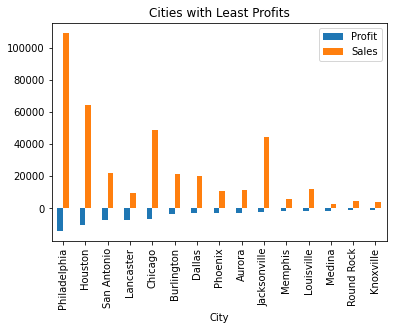

In [ ]:
df.groupby('City')['Profit','Sales'].sum().sort_values(by='Profit').head(15).plot.bar()
plt.title('Cities with Least Profits')
plt.show()

Philadelphia,Houston,San Antonia, Lancaseter,Chicago seems to be the states with least profits (Lancasters order had the least profit in the whole table)

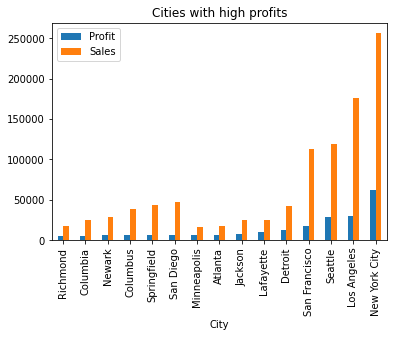

In [ ]:
df.groupby('City')['Profit','Sales'].sum().sort_values(by='Profit').tail(15).plot.bar()
plt.title('Cities with high profits')
plt.show()

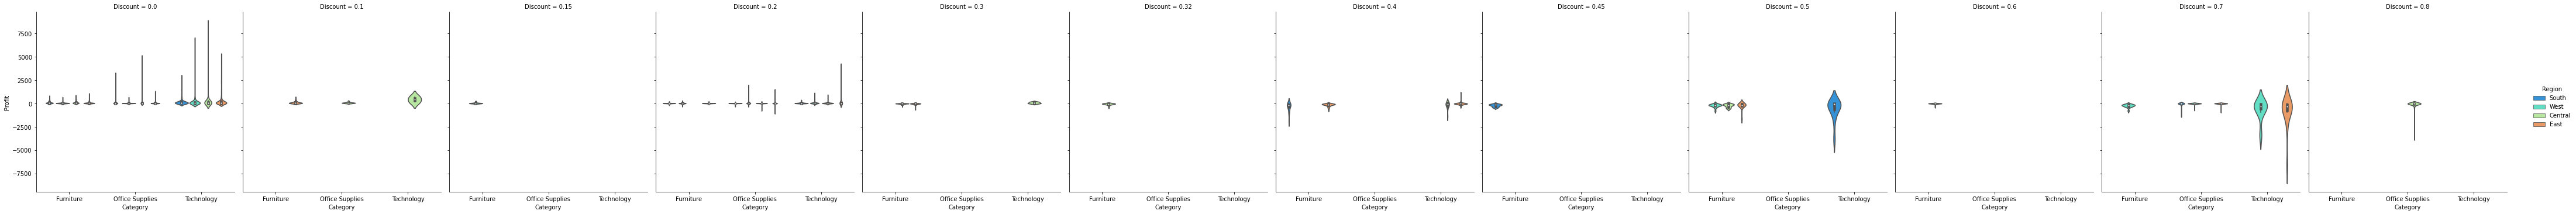

In [ ]:
sns.catplot(x="Category", y="Profit", hue="Region",col="Discount",
            kind = 'violin',data=df, palette = "rainbow")

The highest discount is given(0.5 - 0.7) mainly for Technology and then Furniture. 0.8 discount was only given for Office Supplies in central.
- Lower discounts are given for south region.
- Higher discounts are given for central regions, explaining Central regions loss.
- Office supplies(maybe due to their higher orders/since most of their products brings in the least profit) are given the least nummber of discounts.

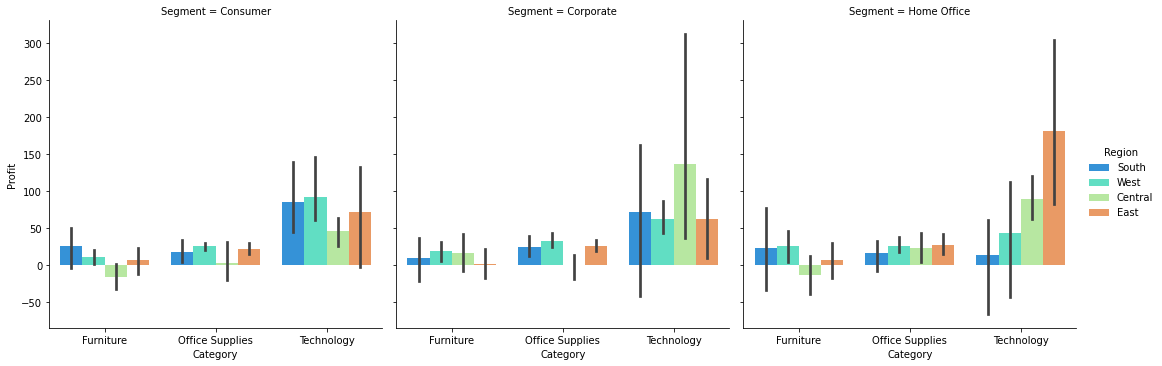

In [ ]:
sns.catplot(x="Category", y="Profit", hue="Region",col="Segment",
            kind = 'bar',data=df, palette = "rainbow")

- We see that the Central region is the one having least profit since it's having loss in Furniture sector in both Consumer & Home Office Segment.
- The central region also performs poor in Office Supplies(except for Home Office) and has the most loss in Consumer (who are the main customer) and Home Office segment from Furniture sales.
- Except for the Technology category in the Home Office sector,the South region is having good profits in all other sections.(considering they had less value_counts)
- Even though Office Supplies are in the most number , technology sector contributes most towards the profit
- West region seems to be the best performer in Office Supplies.
- Furniture category has the least profit.

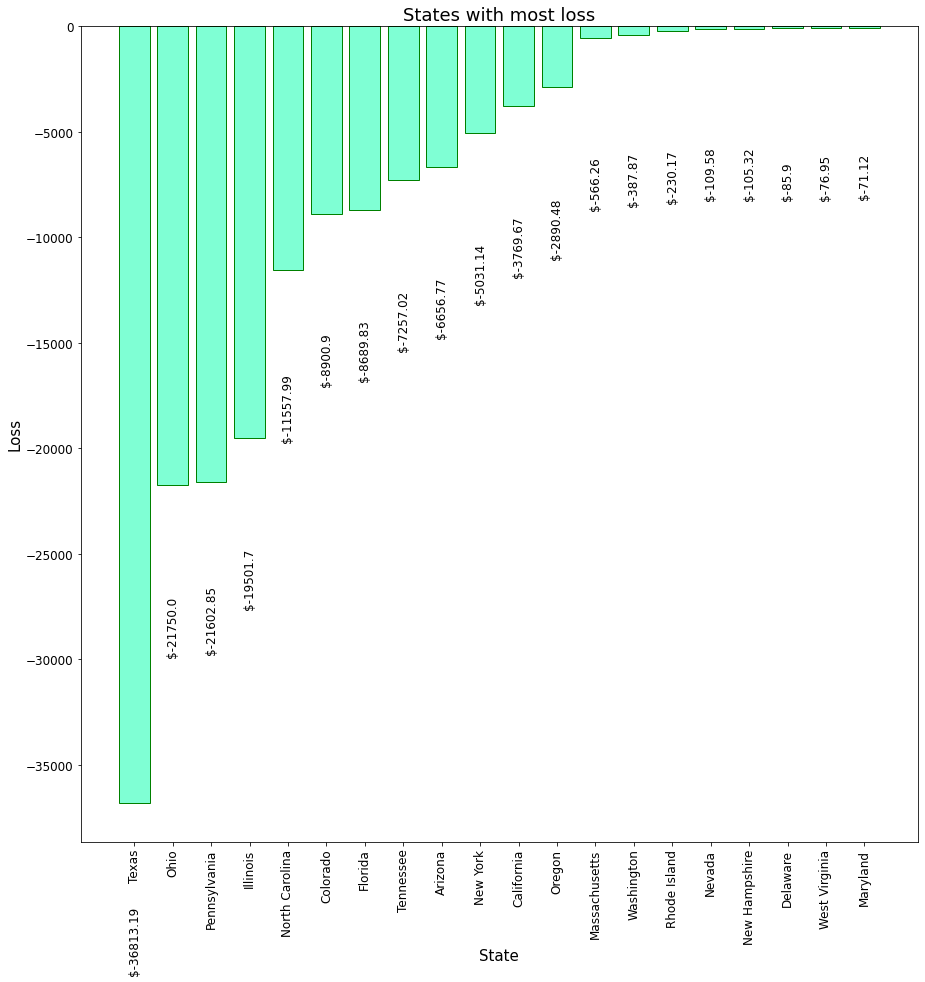

In [ ]:
loss = df.loc[df.Profit<0].groupby(["State"]).sum().sort_values("Profit").head(20) 
loss = loss[["Profit"]].round(2)
loss.reset_index(inplace=True)
plt.figure(figsize = (15,15)) # width and height of figure is defined in inches
plt.title("States with most loss", fontsize=18) 
plt.bar(loss["State"], loss["Profit"],color= '#7fffd4',edgecolor='green', linewidth = 1)
plt.xlabel("State",fontsize=15) # x axis shows the customers 
plt.ylabel("Loss",fontsize=15) # y axis shows the Revenue
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
for index,value in loss["Profit"].items(): #To show the exact revenue generated on the figure
    plt.text(index,value-8000,'$'+ str(value), fontsize=12,rotation=90,color='k', horizontalalignment='center');


<Figure size 720x720 with 0 Axes>

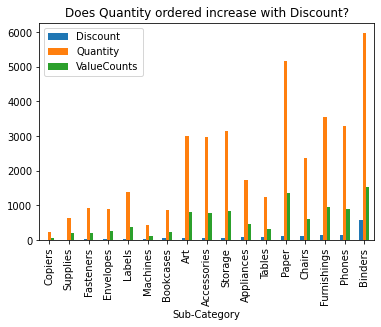

In [ ]:
qdis = df.groupby('Sub-Category')['Discount','Quantity'].sum()
qdis1 = pd.DataFrame(df[['Sub-Category']].value_counts(),columns=['ValueCounts'])
qdis = pd.merge(qdis, qdis1, on = "Sub-Category", how = "inner")
plt.figure(figsize=(10,10))
qdis.sort_values(by='Discount').plot.bar()
plt.title('Does Quantity ordered increase with Discount?')
plt.show()

Only the quantity of products ordered in Office Supplies category (except for most of the loss inducing products in it) seems to be having a postive relationship with discount.

<AxesSubplot:>

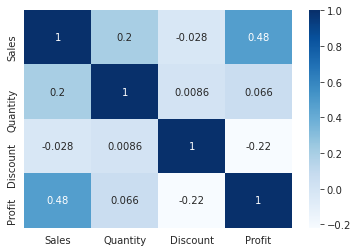

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()

The highest correlation coefficient here is 0.48, to assume a stronger linear relationship we need it be > 0.5,due to this and by observing the previous plots we can say that there is no *strong* relationship between any variables.

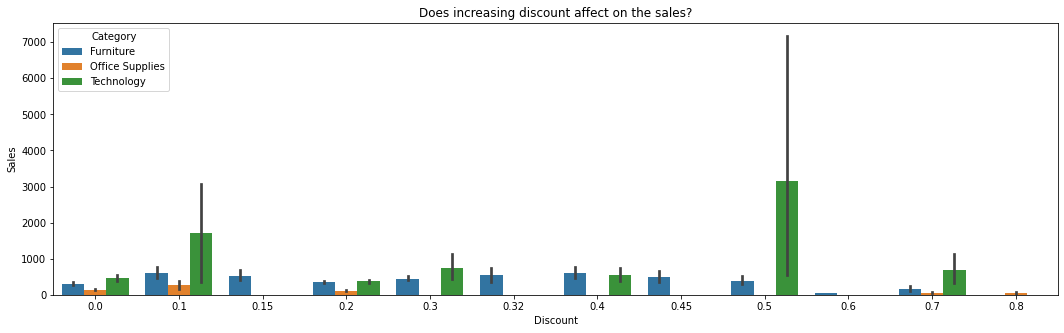

In [ ]:
axes,fig=plt.subplots(1,1,figsize=(18,5))
sns.barplot("Discount",'Sales',data=df,hue = 'Category')
plt.title('Does increasing discount affect on the sales?')
plt.show()

- The increasing discount seems to be mostly affecting the sales of Technology products (maybe due to their higher prices).
- It affects the sales of Office Supplies the least since they might be priced the least and does'nt hold up to the sales made from technology.
- Technology and furniture products are reasonably more affected by the seasonality of the year/just the demand for them,so it makes sense that discount affects them the most.(Ex. Buying a table/chair on discount to satiate the neccessity or buying a phone/appliance on sale for the holidays)

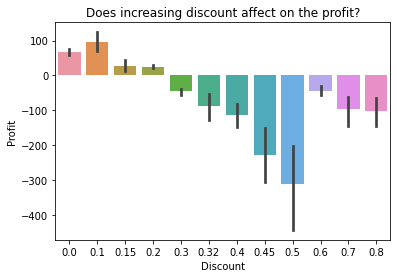

In [ ]:
sns.barplot("Discount",'Profit',data=df)
plt.title('Does increasing discount affect on the profit?')
plt.show()

Unlike the case of Discount-Sales , we see a very clear downward pattern in the above plot. After a discount of 0.3 the superstore is loosing money steadily.But since the higher discounts are given only for a few products, those don't take a toll on the profit much.